In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


In [4]:
# dependencies for map
#import geopandas as gpd
#import folium
#import seaborn as sns
#import plotly.express as px


In [2]:
# Import, clean, and filter data as necessary 
df = pd.read_csv('data/chicago_crime_2019_2023.csv')
df.dropna(subset=['community_area'], inplace=True)
df['community_area'] = df['community_area'].astype(int)

In [4]:
df['primary_type'].unique()

array(['CRIMINAL SEXUAL ASSAULT', 'ROBBERY', 'PUBLIC PEACE VIOLATION',
       'WEAPONS VIOLATION', 'PROSTITUTION', 'SEX OFFENSE',
       'OFFENSE INVOLVING CHILDREN', 'NARCOTICS',
       'INTERFERENCE WITH PUBLIC OFFICER', 'OTHER OFFENSE', 'HOMICIDE',
       'BATTERY', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE',
       'CRIMINAL TRESPASS', 'THEFT', 'ARSON', 'INTIMIDATION', 'STALKING',
       'CRIMINAL DAMAGE', 'KIDNAPPING', 'BURGLARY',
       'LIQUOR LAW VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION',
       'CRIM SEXUAL ASSAULT', 'OTHER NARCOTIC VIOLATION', 'OBSCENITY',
       'HUMAN TRAFFICKING', 'GAMBLING', 'NON-CRIMINAL',
       'PUBLIC INDECENCY', 'RITUALISM'], dtype=object)

In [46]:
# convert from utc to datetime and remove time zone effect
df['date'] = pd.to_datetime(df['date'], utc=True)
df['date'] = df['date'].dt.tz_localize(None)
df.head()

,unique_key,date,block,primary_type,description,ward,community_area
0,12465794,2021-08-27 10:00:00,104XX S MICHIGAN AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,9.0,49
1,12788122,2022-08-08 11:42:00,007XX E 103RD ST,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,9.0,50
2,12502168,2021-10-04 08:10:00,0000X W 103RD ST,ROBBERY,ATTEMPT ARMED - HANDGUN,34.0,49
3,13001633,2023-03-05 05:15:00,009XX E 104TH ST,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,9.0,50
4,11830976,2019-09-16 11:53:00,009XX E 104TH ST,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,9.0,50


In [48]:
df['primary_type'] = df['primary_type'].replace('CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT')


In [49]:
# adding csv for community area numbers
comm_areas = pd.read_csv('data/CommAreas.csv')

# merging community name to df
df1 = pd.merge(df, comm_areas, on='community_area', how='left')
df1.head()

,unique_key,date,block,primary_type,description,ward,community_area,community
0,12465794,2021-08-27 10:00:00,104XX S MICHIGAN AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,9.0,49,ROSELAND
1,12788122,2022-08-08 11:42:00,007XX E 103RD ST,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,9.0,50,PULLMAN
2,12502168,2021-10-04 08:10:00,0000X W 103RD ST,ROBBERY,ATTEMPT ARMED - HANDGUN,34.0,49,ROSELAND
3,13001633,2023-03-05 05:15:00,009XX E 104TH ST,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,9.0,50,PULLMAN
4,11830976,2019-09-16 11:53:00,009XX E 104TH ST,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,9.0,50,PULLMAN


In [ ]:
agg_df = df1.pivot_table(index='community', columns='primary_type', aggfunc='size', fill_value=0)
agg_df.to_csv('output/agg_data.csv')

agg_df


In [7]:
# analysis of most common types and subtypes of crimes over 5 year span

# can do bar graph showing which ones were most common


In [50]:
pd.DataFrame(df['primary_type'].value_counts()).head(10)

,count
primary_type,
THEFT,242353
BATTERY,206458
CRIMINAL DAMAGE,126935
ASSAULT,97394
DECEPTIVE PRACTICE,83666
MOTOR VEHICLE THEFT,73562
OTHER OFFENSE,69693
ROBBERY,40811
WEAPONS VIOLATION,39386


In [51]:
total_df = df1.groupby('community').size().reset_index(name='total_crimes')
total_df.sort_values(by='total_crimes',ascending=False).head(10)

,community,total_crimes
5,AUSTIN,61169
47,NEAR NORTH SIDE,47274
49,NEAR WEST SIDE,40137
65,SOUTH SHORE,38987
41,LOOP,36044
52,NORTH LAWNDALE,35165
32,HUMBOLDT PARK,32004
75,WEST TOWN,31558
4,AUBURN GRESHAM,31504
29,GREATER GRAND CROSSING,29430


In [52]:
# Create df's for each of the ten most common crimes in Chicago from 2019-Oct 2023, grouped by community
theft_df = df1[df1['primary_type'] == 'THEFT']
theft_df = theft_df.groupby('community').size().reset_index(name='thefts')

battery_df = df1[df1['primary_type'] == 'BATTERY']
battery_df = battery_df.groupby('community').size().reset_index(name='batteries')

criminal_damage_df = df1[df1['primary_type'] == 'CRIMINAL DAMAGE']
criminal_damage_df = criminal_damage_df.groupby('community').size().reset_index(name='criminal_damages')

assault_df = df1[df1['primary_type'] == 'ASSAULT']
assault_df = assault_df.groupby('community').size().reset_index(name='assaults')

decep_prac_df = df1[df1['primary_type'] == 'DECEPTIVE PRACTICE']
decep_prac_df = decep_prac_df.groupby('community').size().reset_index(name='deceptive_practices')

mv_theft_df = df1[df1['primary_type'] == 'MOTOR VEHICLE THEFT']
mv_theft_df = mv_theft_df.groupby('community').size().reset_index(name='motor_vehicle_thefts')

other_df = df1[df1['primary_type'] == 'OTHER OFFENSE']
other_df = other_df.groupby('community').size().reset_index(name='other_offenses')

robbery_df = df1[df1['primary_type'] == 'ROBBERY']
robbery_df = robbery_df.groupby('community').size().reset_index(name='robberies')

weapons_df = df1[df1['primary_type'] == 'WEAPONS VIOLATION']
weapons_df = weapons_df.groupby('community').size().reset_index(name='weapons_violations')

burglary_df = df1[df1['primary_type'] == 'BURGLARY']
burglary_df = burglary_df.groupby('community').size().reset_index(name='burglaries')

In [53]:
# Top ten crimes, by community sorted by total # of crimes

top_types_by_comm = pd.merge(theft_df,battery_df,on='community').merge(criminal_damage_df,on='community').merge(assault_df,on='community').merge(decep_prac_df,on='community').merge(mv_theft_df,on='community').merge(other_df,on='community').merge(robbery_df,on='community').merge(weapons_df,on='community').merge(burglary_df,on='community').merge(total_df,on='community')
top_types_by_comm.sort_values(by='total_crimes',ascending=False).head(10)
#top_types_by_comm[top_types_by_comm['community'] == 'LAKE VIEW']
#top_types_by_comm[top_types_by_comm['community'] == 'NORTH CENTER']

,community,thefts,batteries,criminal_damages,assaults,deceptive_practices,motor_vehicle_thefts,other_offenses,robberies,weapons_violations,burglaries,total_crimes
5,AUSTIN,8687,13712,7010,5852,3424,4395,4012,2818,2731,1591,61169
47,NEAR NORTH SIDE,18596,6381,2780,2701,5689,2186,1565,1634,946,1042,47274
49,NEAR WEST SIDE,13256,5789,3981,3009,3229,2914,2058,1591,589,945,40137
65,SOUTH SHORE,5898,8814,5092,4023,1897,3058,2635,1419,1461,1799,38987
41,LOOP,15728,4480,2302,2040,4187,1393,1146,1214,416,559,36044
52,NORTH LAWNDALE,4142,7810,3848,3112,1356,1986,2084,1529,2048,701,35165
32,HUMBOLDT PARK,4346,6132,3238,2616,1344,1839,1926,1515,1356,968,32004
75,WEST TOWN,11091,3715,3457,1898,2481,2437,1302,1631,415,1492,31558
4,AUBURN GRESHAM,4536,6813,4100,3281,1773,2156,2251,1038,1662,1209,31504
29,GREATER GRAND CROSSING,3948,6696,3763,3163,1245,2377,1889,1148,1718,1095,29430


In [54]:
top_10_communities = top_types_by_comm.nlargest(10, 'total_crimes')


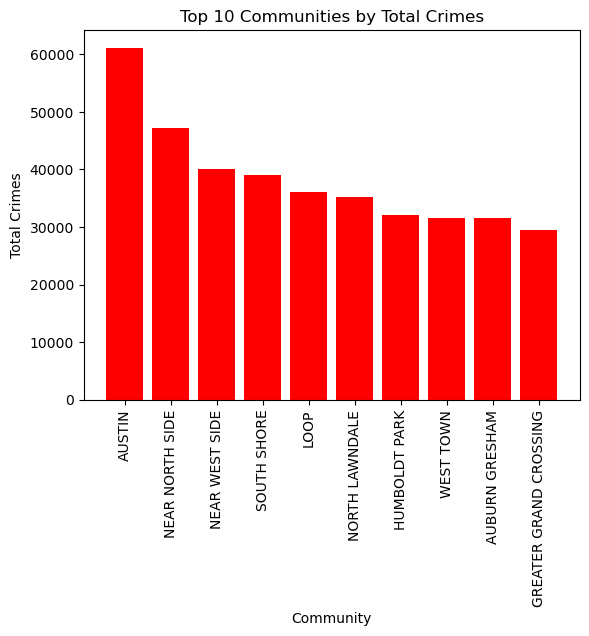

In [55]:
plt.bar(top_10_communities['community'], top_10_communities['total_crimes'], color='red')
plt.xticks(rotation=90)
plt.xlabel('Community')
plt.ylabel('Total Crimes')
plt.title('Top 10 Communities by Total Crimes')
plt.show()

In [8]:
# analysis by community area (neighborhood/location) / major streets or popular locations?

# map? can compare different community areas / neighborhoods

In [56]:
murder_df = df1[df1['primary_type'] == 'HOMICIDE']
murder_df = murder_df.groupby('community').size().reset_index(name='murders')
murder_df.sort_values(by='murders',ascending=False).head(10)

,community,murders
5,AUSTIN,294
51,NORTH LAWNDALE,163
63,SOUTH SHORE,161
69,WEST GARFIELD PARK,153
4,AUBURN GRESHAM,148
32,HUMBOLDT PARK,146
29,GREATER GRAND CROSSING,143
68,WEST ENGLEWOOD,129
23,ENGLEWOOD,125
59,ROSELAND,122


In [57]:
pd.DataFrame(df1['community'].value_counts()).head(10)

,count
community,
AUSTIN,61169
NEAR NORTH SIDE,47274
NEAR WEST SIDE,40137
SOUTH SHORE,38987
LOOP,36044
NORTH LAWNDALE,35165
HUMBOLDT PARK,32004
WEST TOWN,31558
AUBURN GRESHAM,31504


In [58]:
# Loop for taking the most common primary_type for each community area in df1
# empty df to hold results
result_df = pd.DataFrame(columns=['community', 'most_common_crime'])

# Iterate through unique community areas
communities = df1['community'].unique()

for community in communities:
    # Filter the DataFrame for the current community
    community_data = df1[df1['community'] == community]
    
    # Count the occurrences of each primary type in the community
    primary_type_counts = community_data['primary_type'].value_counts()
    
    # Find the most common primary type in the community
    most_common_primary_type = primary_type_counts.idxmax()
    
    # Append the result to a list of DataFrames
    result_df = pd.concat([result_df, pd.DataFrame({'community': [community], 'most_common_crime': [most_common_primary_type]})], ignore_index=True)

result_df.to_csv('output/result.csv', index=False)

In [61]:
result_df['most_common_crime'].value_counts()

most_common_crime
THEFT                 41
BATTERY               34
DECEPTIVE PRACTICE     2
Name: count, dtype: int64

In [11]:
# time of year / season / by months

# number of crimes (or violent crimes) per month / season - visualization

In [60]:
df1['month'] = df1['date'].dt.strftime('%B')
df1

,unique_key,date,block,primary_type,description,ward,community_area,community,month
0,12465794,2021-08-27 10:00:00,104XX S MICHIGAN AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,9.0,49,ROSELAND,August
1,12788122,2022-08-08 11:42:00,007XX E 103RD ST,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,9.0,50,PULLMAN,August
2,12502168,2021-10-04 08:10:00,0000X W 103RD ST,ROBBERY,ATTEMPT ARMED - HANDGUN,34.0,49,ROSELAND,October
3,13001633,2023-03-05 05:15:00,009XX E 104TH ST,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,9.0,50,PULLMAN,March
4,11830976,2019-09-16 11:53:00,009XX E 104TH ST,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,9.0,50,PULLMAN,September
...,...,...,...,...,...,...,...,...,...
1120315,12052020,2020-05-15 05:30:00,053XX S DORCHESTER AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,4.0,41,HYDE PARK,May
1120316,12594681,2022-01-17 12:30:00,016XX E 56TH ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,5.0,41,HYDE PARK,January
1120317,12099949,2020-06-28 09:00:00,048XX N DAMEN AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,47.0,4,LINCOLN SQUARE,June
1120318,11814121,2019-08-30 12:00:00,052XX W FERDINAND ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,37.0,25,AUSTIN,August


In [62]:
season_df = df1.copy()
season_df['season'] = ''

season_map = {
    'December': 'Winter',
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Fall',
    'October': 'Fall',
    'November': 'Fall'
}

# Use the map function to create the 'season' column
season_df['season'] = season_df['month'].map(season_map)
season_df.head()

,unique_key,date,block,primary_type,description,ward,community_area,community,month,season
0,12465794,2021-08-27 10:00:00,104XX S MICHIGAN AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,9.0,49,ROSELAND,August,Summer
1,12788122,2022-08-08 11:42:00,007XX E 103RD ST,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,9.0,50,PULLMAN,August,Summer
2,12502168,2021-10-04 08:10:00,0000X W 103RD ST,ROBBERY,ATTEMPT ARMED - HANDGUN,34.0,49,ROSELAND,October,Fall
3,13001633,2023-03-05 05:15:00,009XX E 104TH ST,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,9.0,50,PULLMAN,March,Spring
4,11830976,2019-09-16 11:53:00,009XX E 104TH ST,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,9.0,50,PULLMAN,September,Fall


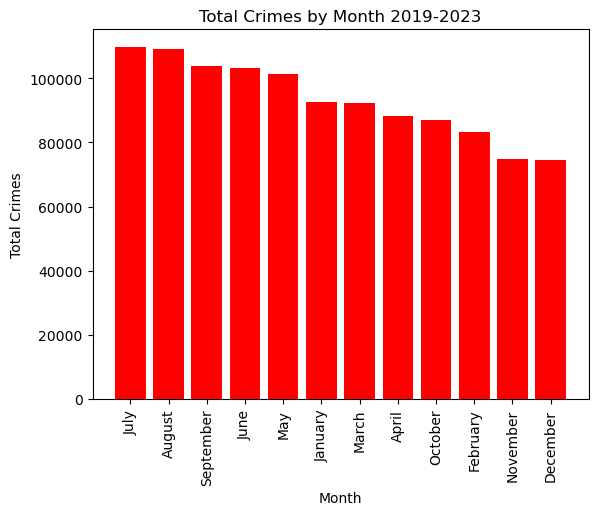

In [63]:
months_df = pd.DataFrame(df1['month'].value_counts())
plt.bar(months_df.index, months_df['count'], color='red')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Month 2019-2023')
plt.show()

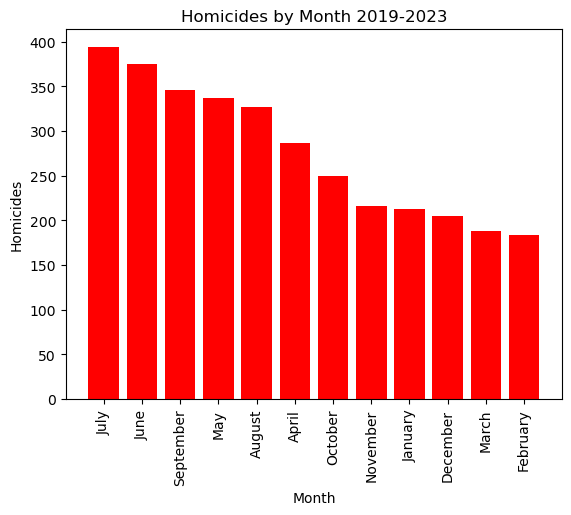

In [64]:
murder1_df = df1[df1['primary_type'] == 'HOMICIDE']
murder1_df = pd.DataFrame(murder1_df['month'].value_counts())

plt.bar(murder1_df.index, murder1_df['count'], color='red')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Homicides')
plt.title('Homicides by Month 2019-2023')
plt.show()

In [65]:
pd.DataFrame(season_df['season'].value_counts())

,count
season,
Summer,322185
Spring,281854
Fall,265862
Winter,250419


In [66]:
df1['year'] = df1['date'].dt.strftime('%Y')
df1.head()

,unique_key,date,block,primary_type,description,ward,community_area,community,month,year
0,12465794,2021-08-27 10:00:00,104XX S MICHIGAN AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,9.0,49,ROSELAND,August,2021
1,12788122,2022-08-08 11:42:00,007XX E 103RD ST,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,9.0,50,PULLMAN,August,2022
2,12502168,2021-10-04 08:10:00,0000X W 103RD ST,ROBBERY,ATTEMPT ARMED - HANDGUN,34.0,49,ROSELAND,October,2021
3,13001633,2023-03-05 05:15:00,009XX E 104TH ST,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,9.0,50,PULLMAN,March,2023
4,11830976,2019-09-16 11:53:00,009XX E 104TH ST,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,9.0,50,PULLMAN,September,2019


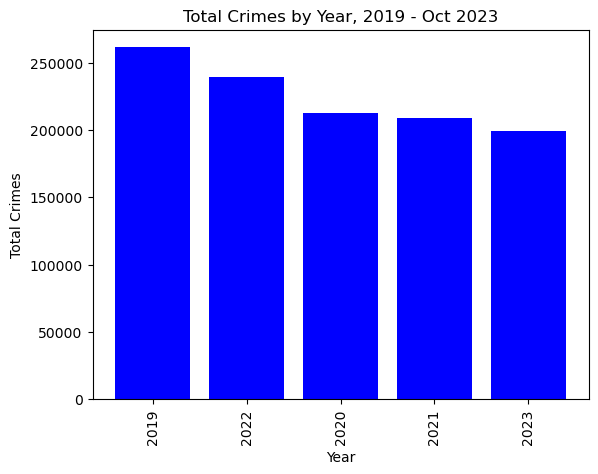

In [69]:
year_df = df1['year'].value_counts()
year_df = pd.DataFrame(year_df)
plt.bar(year_df.index, year_df['count'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Year, 2019 - Oct 2023')
plt.show()

In [104]:
# getting monthly counts of crime for 2019
months2019_df = df1[df1['year'] == '2019']
months2019_df = pd.DataFrame(months2019_df['month'].value_counts())
months2019_df.reset_index(level=0,inplace=True)

# reordering rows to be in chronological order by month
custom_month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
months2019_df['month'] = pd.Categorical(months2019_df['month'], categories=custom_month_order, ordered=True)
months2019_df = months2019_df.sort_values('month')
months2019_df.reset_index(drop=True, inplace=True)

# repeating two previous steps for 2022
months2022_df = df1[df1['year'] == '2022']
months2022_df = pd.DataFrame(months2022_df['month'].value_counts())
months2022_df.reset_index(level=0,inplace=True)

months2022_df['month'] = pd.Categorical(months2022_df['month'], categories=custom_month_order, ordered=True)
months2022_df = months2022_df.sort_values('month')
months2022_df.reset_index(drop=True, inplace=True)

months2022_df

,month,count
0,January,15618
1,February,15237
2,March,18386
3,April,18000
4,May,20144
5,June,20791
6,July,22276
7,August,22305
8,September,22340
9,October,23203


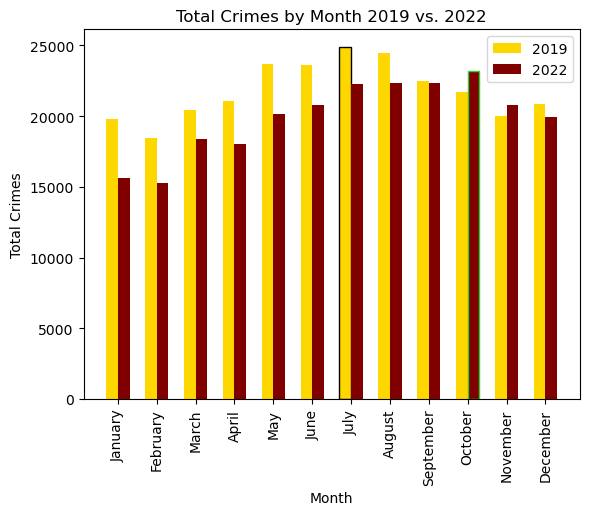

In [132]:
# plotting bar graph comparing monthly crime totals for 2019 and 2022
# setting value for x ticks
x = list(range(len(months2019_df.index)))

# Find the highest months
highest_month_2019 = months2019_df.loc[months2019_df['count'].idxmax()]['month']
highest_month_2022 = months2022_df.loc[months2022_df['count'].idxmax()]['month']

# offsetting bars to compare and not overlap
# showing count of total crimes for each year
# also outlining the highest month in each year
bars2019 = plt.bar([i - 0.15 for i in x], months2019_df['count'], 0.3, label='2019', color='gold')
for i, month in enumerate(months2019_df['month']):
    if month == highest_month_2019:
        bars2019[i].set_edgecolor('black')

bars2022 = plt.bar([i + 0.15 for i in x], months2022_df['count'], 0.3, label='2022', color='maroon')
for i, month in enumerate(months2022_df['month']):
    if month == highest_month_2022:
        bars2022[i].set_edgecolor('limegreen')

plt.xticks(x,months2019_df['month'],rotation=90)
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Month 2019 vs. 2022')
plt.legend()
plt.show()

In [ ]:

plt.bar(months_df.index, months_df['count'], color='red')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Month 2019-2023')
plt.show()